In [59]:
import numpy as np
from PIL import Image
from perlin_noise import PerlinNoise
import matplotlib.pyplot as plt

In [60]:
import ipywidgets as widgets
from ipywidgets import interact

In [61]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [62]:
%matplotlib notebook

In [63]:
from colour import Color
first = Color("#020024")
second = Color("#45164d")
third = Color("#582296")
colors1 = list(first.range_to(second, 60))
colors2 = list(second.range_to(third, 40))
colors = colors1 + colors2

In [75]:
noise = PerlinNoise(octaves=5, seed=4)
xpix, ypix = 16, 16
frames = 16
grayscale = [[[noise([f/frames, i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)] for f in range(frames)]

In [76]:
data_np = np.array(grayscale)
temp = np.add(data_np, 0.5)
temp = np.multiply(temp, 100)
temp = np.floor(temp)
temp = np.clip(temp, 0, 99)
grad_indices = np.array(temp, dtype=np.int32)

In [77]:
flat = grad_indices.flatten()
flat_rgb = np.array([colors[i].rgb for i in flat]).flatten()
rgb_data = np.reshape(flat_rgb, (frames,xpix,ypix,3))

<IPython.core.display.Javascript object>


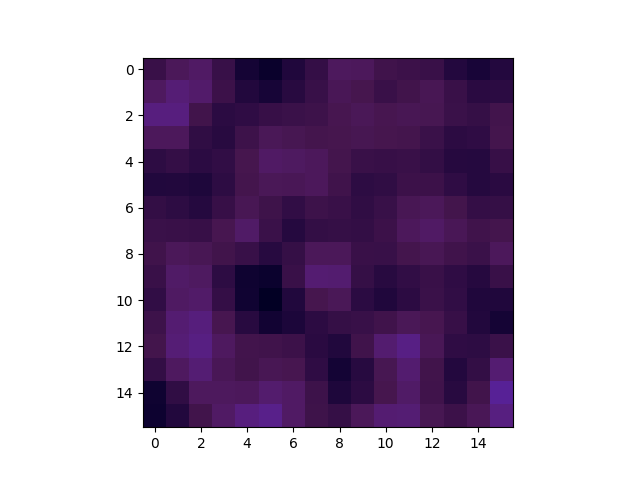

In [80]:
fig, ax = plt.subplots()


def get_frame(f):
    return rgb_data[f]


# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(len(data)):
    im = ax.imshow(get_frame(i), animated=True)
    if i == 0:
        ax.imshow(get_frame(i))  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=150, blit=True,
                                repeat_delay=0)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()